In [16]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import *
import pickle
import csv
from sklearn.metrics import accuracy_score

In [17]:
# Import dataset

dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [18]:
# Divide data into features and label

y_data_set = np.array(pd.DataFrame(dataset.Salary))
x_data_set = np.array(dataset["Level"])

In [19]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x_data_set.reshape(-1, 1) )
y = sc_y.fit_transform(y_data_set.reshape(-1, 1) )

In [20]:
print("shape of x data",x.shape)
print("shape of y data",y.shape)

shape of x data (10, 1)
shape of y data (10, 1)


In [21]:
os.mkdir("CSV_file")
def csv_file(x_train_data,y_train_data,file_name):
    #load data to csv file
    myData = x_train_data
   
    myFile = open('CSV_file/'+file_name, 'w')  
    with myFile:
        writer = csv.writer(myFile)
        writer.writerows(myData)
   
    colnames=['x'] 
    df = pd.read_csv('CSV_file/'+file_name, names=colnames, header=None)
    # inserting column with static value in data frame 
    df.insert(1, "y", y_train_data)
   
    df.to_csv('CSV_file/'+file_name, index =  False)

In [22]:
def splitdata(x, y):
    
    x_train_data,x_test_data,y_train_data,y_test_data = train_test_split(x,y,test_size = 1/3, random_state=0)
    
    csv_file(x_test_data,y_test_data,'test_data.csv')

    x_train_data, x_cv_data, y_train_data, y_cv_data = train_test_split(x_train_data,y_train_data,test_size = 0.40,random_state=0)
    
    csv_file(x_train_data,y_train_data,'train_data.csv')
    csv_file(x_cv_data,y_cv_data,'cv_data.csv') 
#     return x_train_data,x_test_data,y_train_data,y_test_data,x_cv_data,y_cv_data
splitdata(x, y)

In [23]:
dataset1 = pd.read_csv("CSV_file/train_data.csv")

dataset1.shape

(3, 2)

In [24]:
print("x_train shape",x.shape)
print("y_train shape",y.shape)

x_train shape (10, 1)
y_train shape (10, 1)


In [25]:
# regressor = SVR(kernel= 'rbf')
# regressor.fit(x,y)


 Regressor :  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


 Prediction 

 

 prediction of y train data :  [-0.6197853  -0.62924694 -0.56788994 -0.49732233 -0.44690338 -0.36617206
 -0.14115569  0.28557658  0.78226531  1.08559794]


 ACCURACY 



 Accuracy of explained_variance_score : 31.6301491644453

 Accuracy of mean_absolute_error : 77.70072590426558

 visualising using SVR 
 


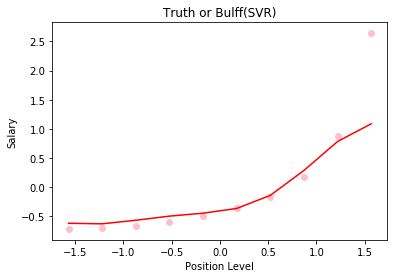


 visualising Regression Model 
 


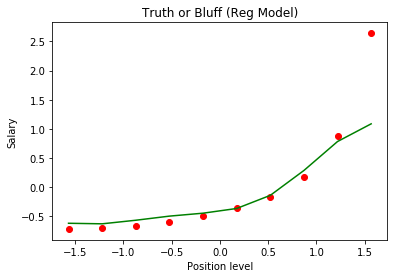

In [26]:
class Support_Vector_Regression:
    
    # fitting Support_Vector_Regression to the training set
    
    def model_train(self,x,y):  
        regressor = SVR(kernel= 'rbf')
        regressor.fit(x,y)
        return regressor
    
    # dump train model pickle file
    
    def pickel_file(self,regressor):
        
       
        file = open('trainmodel.pkl', 'wb')
        pickle.dump(regressor,file)
        file.close()
    
    # predicting the test set result and train set result
    
    def prediction(self,x,regressor):
        print("\n\n Prediction \n\n ")
        # prediction for only 6.5
        y_pred_train = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
        
        # prediction for all data x
        y_pred_train = regressor.predict(x)
        return y_pred_train

    # Accuracy for train and test
    
    
    def accuracy(self,y,y_pred_train):
        

        print("\n\n ACCURACY \n\n")
        Accuracy1 = explained_variance_score(y_pred_train,y) * 100# -4
        print("\n Accuracy of explained_variance_score :", Accuracy1)
       
        error = mean_absolute_error(y, y_pred_train) # 125
        Accuracy2 = (1 -error) * 100
        print("\n Accuracy of mean_absolute_error :", Accuracy2)
        
        return Accuracy1,Accuracy2
    
    
    # visualising the training set results
    def plotting(self,x, y,regressor):
        print("\n visualising using SVR \n ")
        plt.scatter(x, y , color = 'pink')
        plt.plot(x, regressor.predict(x), color = 'red')
        plt.title("Truth or Bulff(SVR)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
        
        print("\n visualising Regression Model \n ")
        plt.scatter(x, y, color ='red')
        plt.plot(x, regressor.predict(x), color ='green')
        plt.title('Truth or Bluff (Reg Model)')
        plt.xlabel('Position level')
        plt.ylabel('Salary')
        plt.show()
 
        
def main(dataset,x,y):
    
    object_SVM = Support_Vector_Regression()
    
    regressor = object_SVM.model_train(x,y)
    print("\n Regressor : ", regressor)
    
    object_SVM.pickel_file(regressor)
    
  
    
    y_pred_train = object_SVM.prediction(x,regressor)
    print("\n prediction of y train data : ",y_pred_train)
    
    Accuracy1,Accuracy2 = object_SVM.accuracy(y,y_pred_train)
    
    
    
    
    object_SVM.plotting(x,y,regressor)
    
    
    
    
    
main(dataset,x,y)
    
